In [1]:
from Assemblies.game import GameField
import numpy as np
from numpy import random
import time

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
eps=0.01
b_points = np.array([1, 9/8, 8/7, 7/6, 6/5, 5/4, 9/7, 4/3, 7/5, 3/2, 8/5, 5/3, 7/4, 9/5, 2, 9/4, 7/3, 5/2, 8/3]) + eps

In [3]:
burnin1=5000
evol1=500

In [4]:
#плотность для конкретного b
def c_density(size=99, percentage=21, off_percentage=10, seed=1, burnin=10000, evol=100, b=b_points[0]): 
    random.seed(seed)
    instance = np.array(np.random.rand(size, size) <= 0.01 * off_percentage, dtype=int) * (-1)
    active_indexes=(-1-instance).nonzero()
    active_size=active_indexes[0].size
    active = np.array(np.random.rand(active_size) > 0.01 * percentage, dtype=int)
    instance[active_indexes]=np.copy(active)

    density = np.zeros(evol)
    
    game = GameField(size, b)
    game.field = np.copy(instance)
    game.evolveQ(burnin)
    for step in range(evol):
        game.evolveQ(1)
        density[step] = np.count_nonzero(np.equal(game.field,0)) / size**2
    return density

# cooperator percentage = 21

## off_percentage = 0

In [5]:
#для каждого b измеряем плотность в 10 разных реализациях на протяжении evol1 шагов. 
#Сначала усредняем по реализациям, потом эту величину - по шагам.
bs=np.linspace(1,3,num=len(b_points)*20)
aver_all=np.zeros(len(bs))
for i in range(len(bs)):
    den=np.zeros((10,evol1))
    
    for j in range(10):
        den[j]=c_density(off_percentage=0,seed=j,burnin=burnin1, evol=evol1,b=bs[i])
    
    aver_seed=np.mean(den,axis=0)
    aver_all[i]=np.mean(aver_seed)

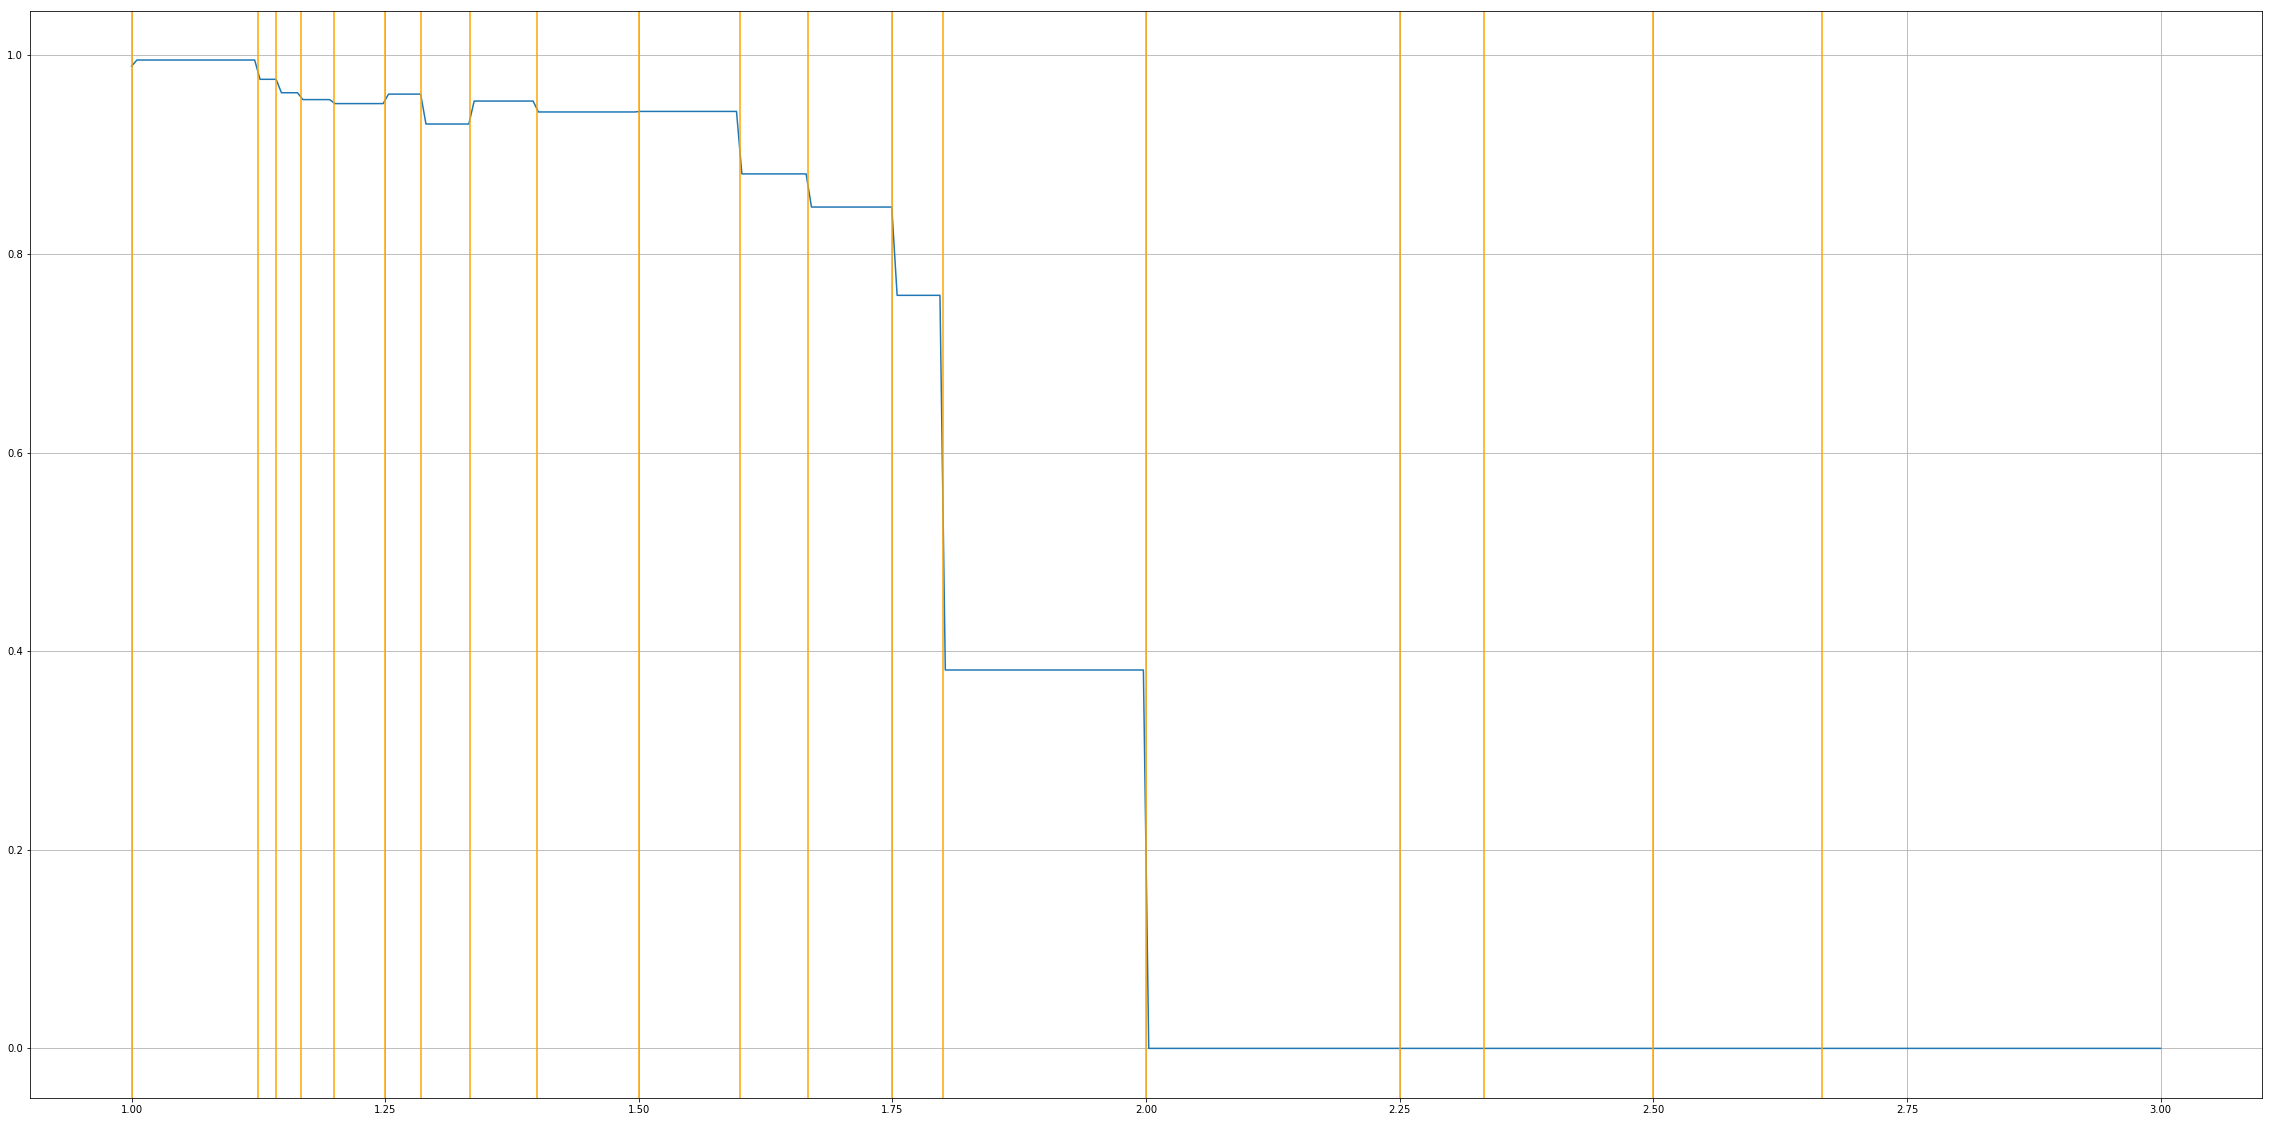

In [6]:
fig,ax=plt.subplots(1,1,figsize=(40,20))
ax.grid(b=True)
ax.plot(bs,aver_all)
for b in (b_points-eps):
    ax.axvline(b,color='orange')

## off_percentage = 10

In [7]:
bs=np.linspace(1,3,num=len(b_points)*20)
aver_all10=np.zeros(len(bs))
for i in range(len(bs)):
    den10=np.zeros((10,evol1))
    
    for j in range(10):
        den10[j]=c_density(off_percentage=10,seed=j,burnin=burnin1, evol=evol1,b=bs[i])
    
    aver_seed10=np.mean(den10,axis=0)
    aver_all10[i]=np.mean(aver_seed10)

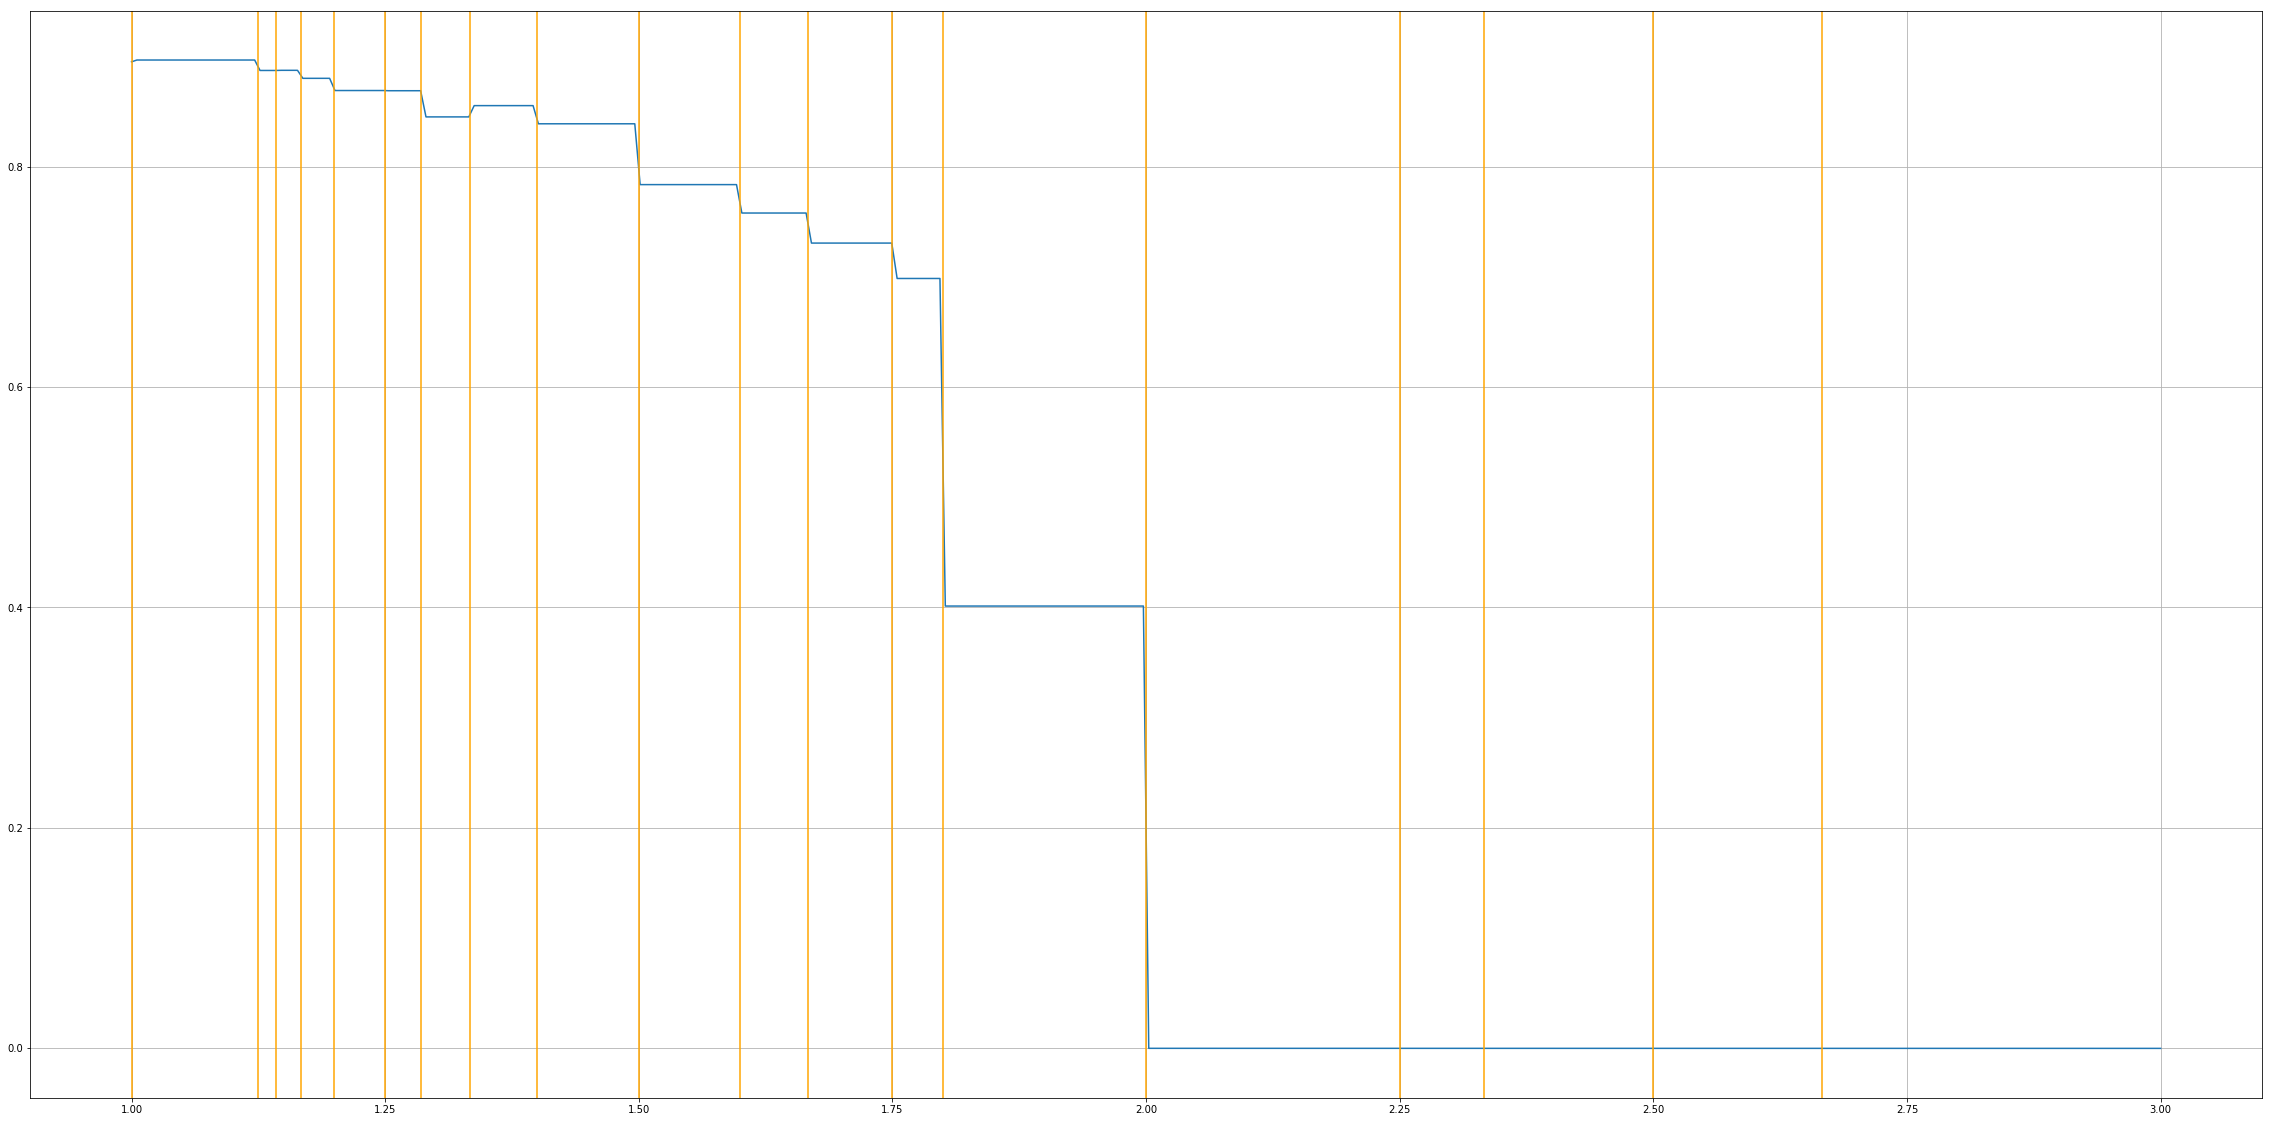

In [8]:
fig,ax=plt.subplots(1,1,figsize=(40,20))
ax.grid(b=True)
ax.plot(bs,aver_all10)
for b in (b_points-eps):
    ax.axvline(b,color='orange')

## off_percentage = 25

In [9]:
bs=np.linspace(1,3,num=len(b_points)*20)
aver_all25=np.zeros(len(bs))
for i in range(len(bs)):
    den25=np.zeros((10,evol1))
    
    for j in range(10):
        den25[j]=c_density(off_percentage=25,seed=j,burnin=burnin1, evol=evol1,b=bs[i])
    
    aver_seed25=np.mean(den25,axis=0)
    aver_all25[i]=np.mean(aver_seed25)

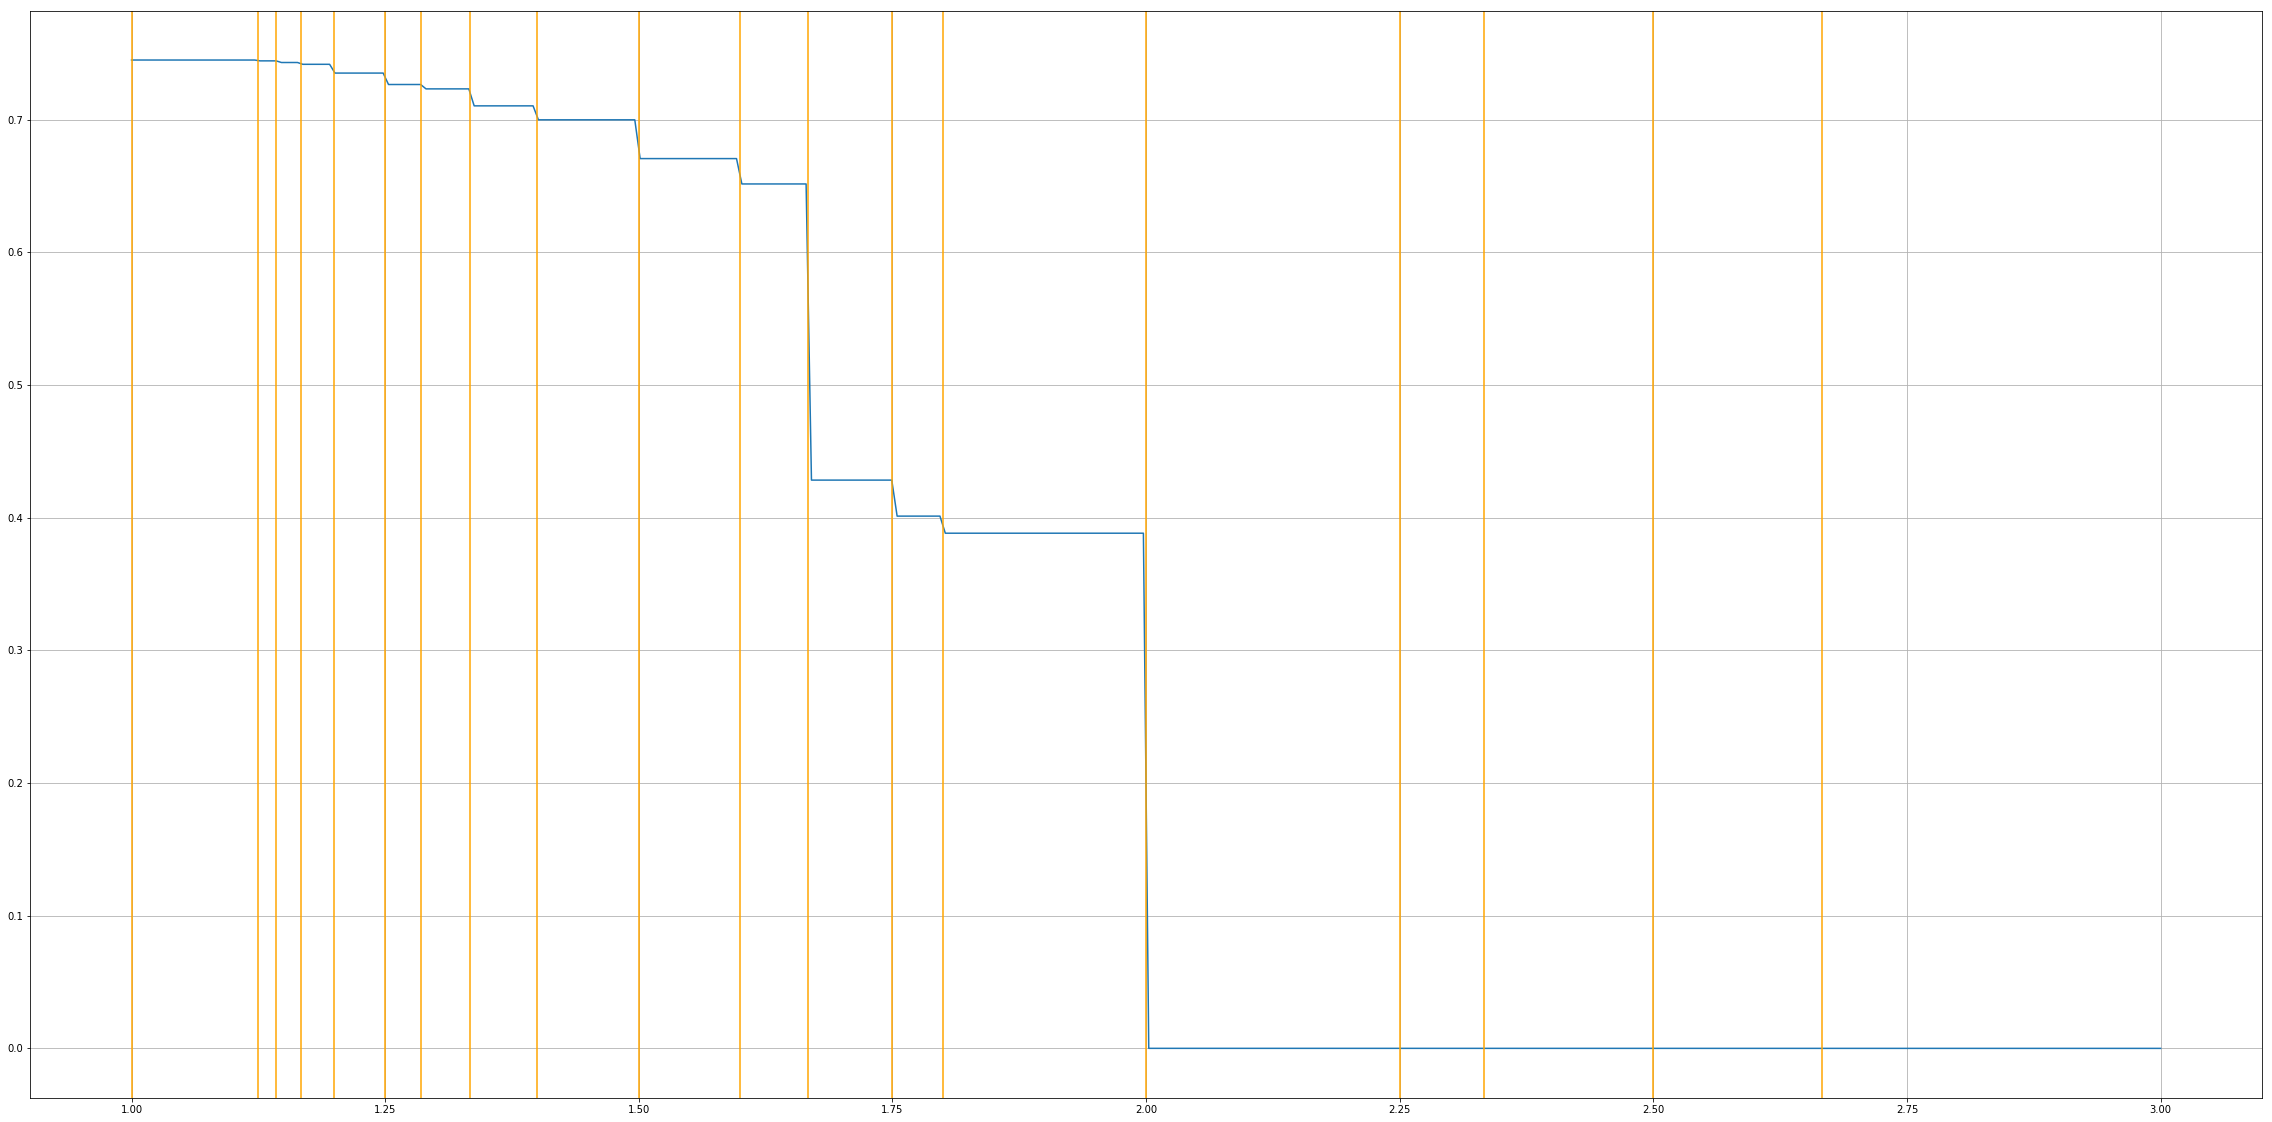

In [10]:
fig,ax=plt.subplots(1,1,figsize=(40,20))
ax.grid(b=True)
ax.plot(bs,aver_all25)
for b in (b_points-eps):
    ax.axvline(b,color='orange')

## off_percentage = 50

In [11]:
bs=np.linspace(1,3,num=len(b_points)*20)
aver_all50=np.zeros(len(bs))
for i in range(len(bs)):
    den50=np.zeros((10,evol1))
    
    for j in range(10):
        den50[j]=c_density(off_percentage=50,seed=j,burnin=burnin1, evol=evol1,b=bs[i])
    
    aver_seed50=np.mean(den50,axis=0)
    aver_all50[i]=np.mean(aver_seed50)

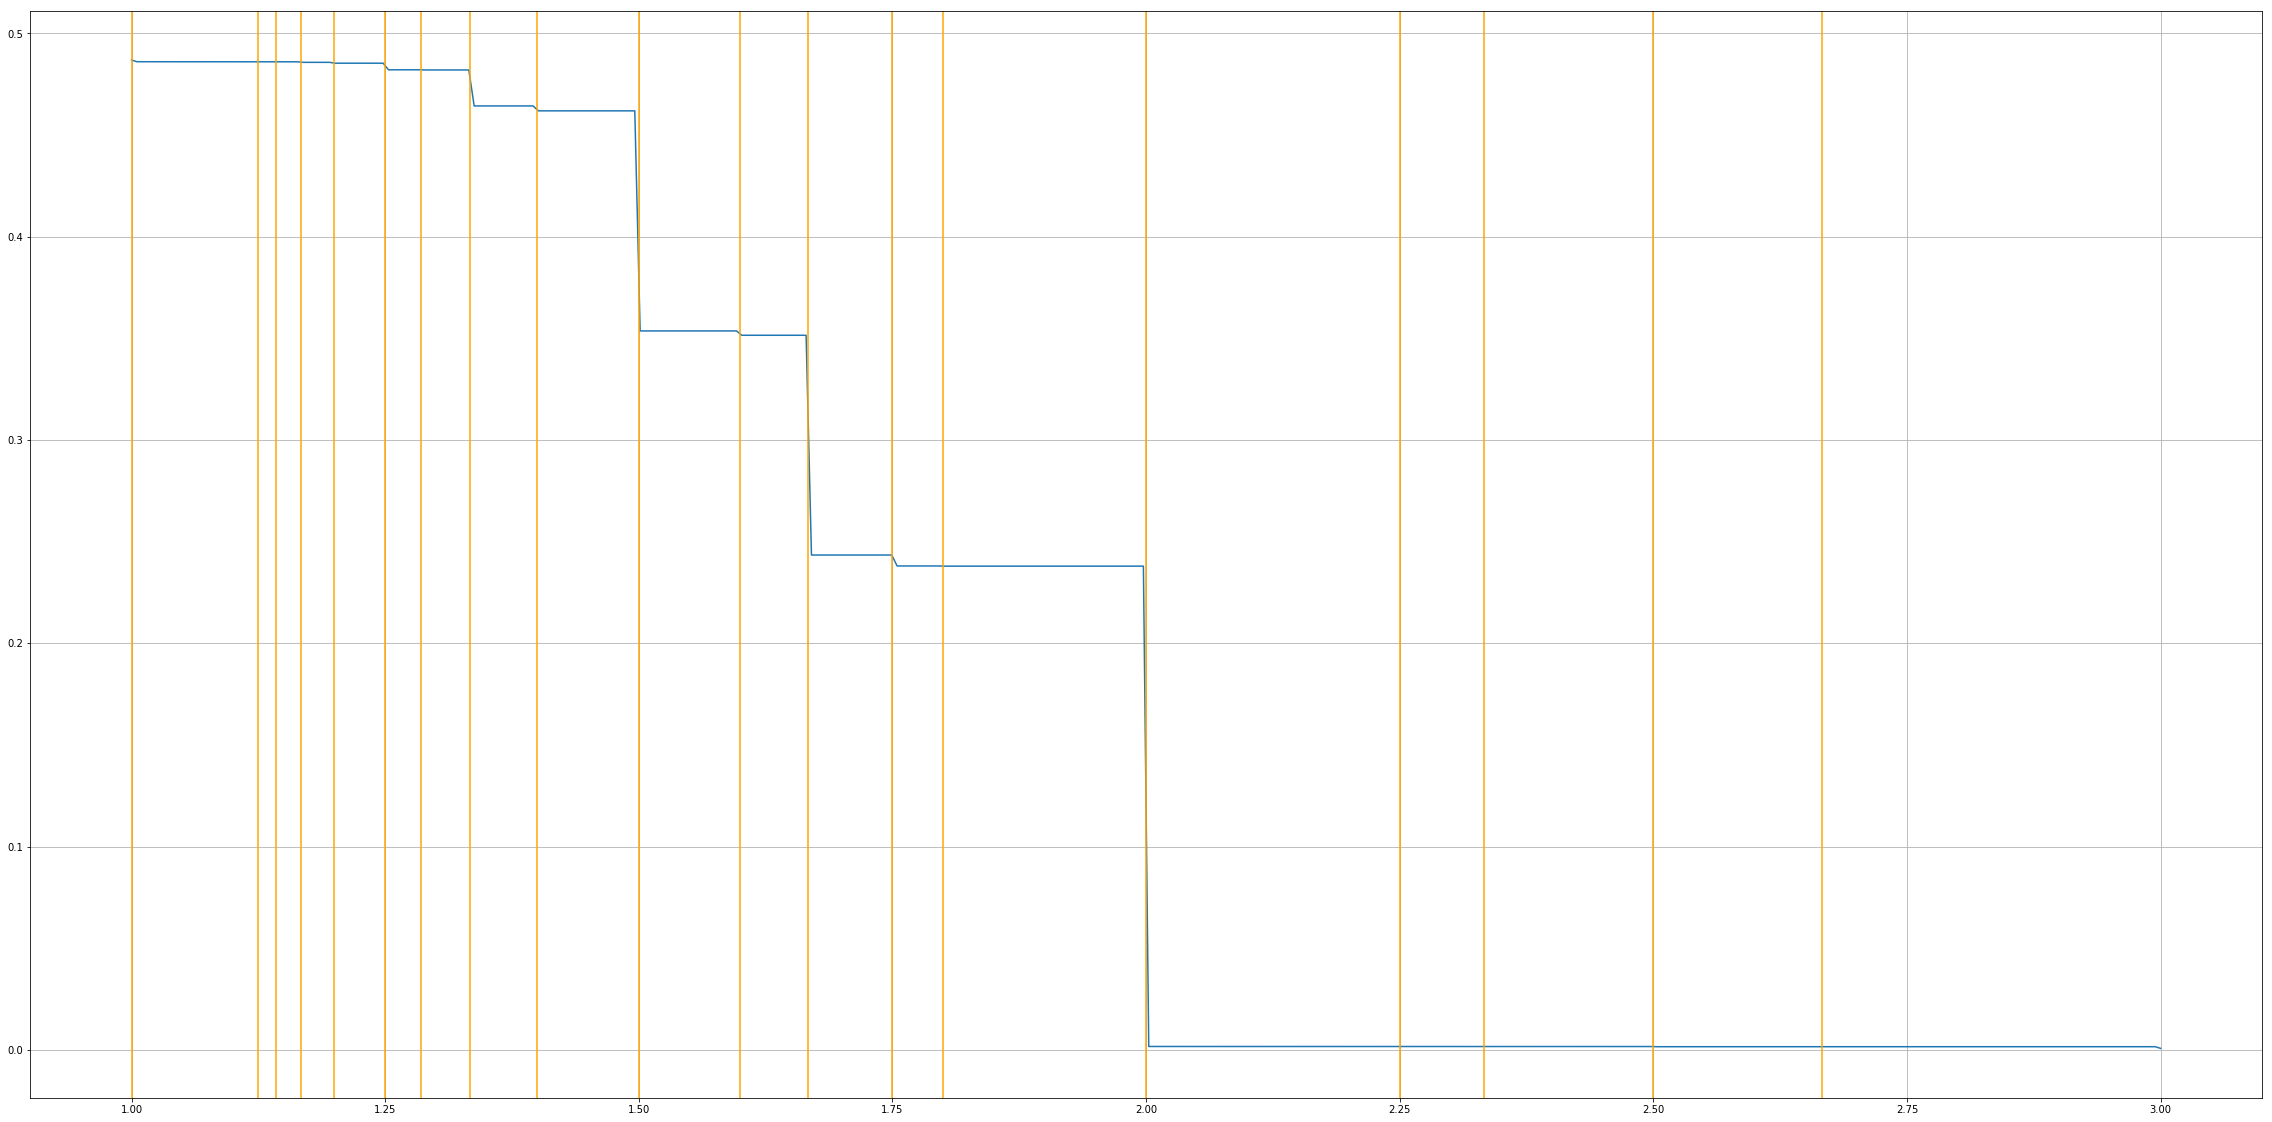

In [12]:
fig,ax=plt.subplots(1,1,figsize=(40,20))
ax.grid(b=True)
ax.plot(bs,aver_all50)
for b in (b_points-eps):
    ax.axvline(b,color='orange')

# cooperator percentage = 50

## off_percentage = 50

In [13]:
bs=np.linspace(1,3,num=len(b_points)*20)
aver_all5050=np.zeros(len(bs))
for i in range(len(bs)):
    den5050=np.zeros((10,evol1))
    
    for j in range(10):
        den5050[j]=c_density(percentage=50,off_percentage=50,seed=j,burnin=burnin1, evol=evol1,b=bs[i])
    
    aver_seed5050=np.mean(den5050,axis=0)
    aver_all5050[i]=np.mean(aver_seed5050)

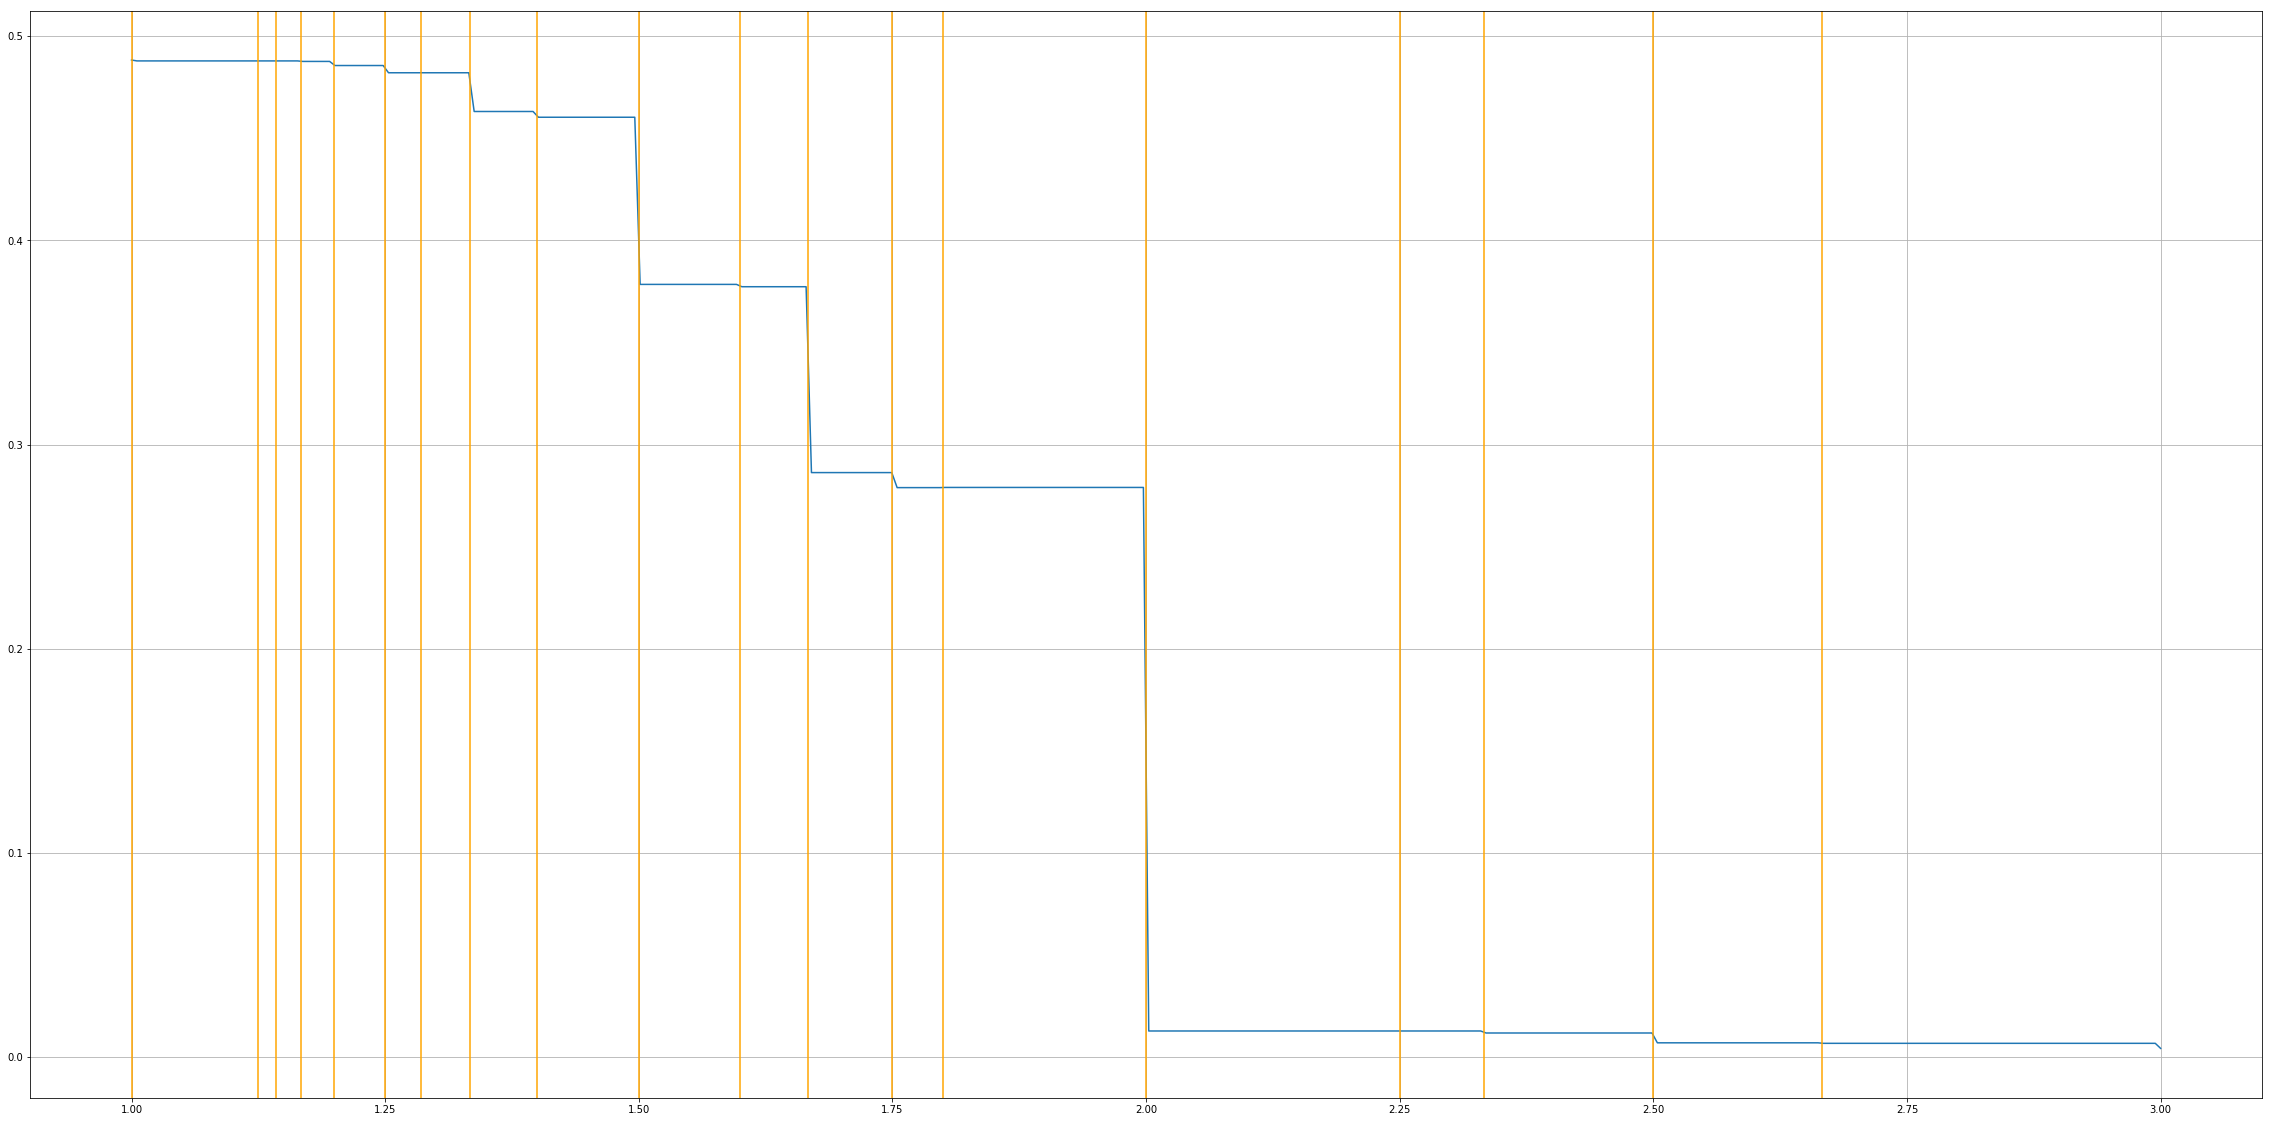

In [16]:
fig,ax=plt.subplots(1,1,figsize=(40,20))
ax.grid(b=True)
ax.plot(bs,aver_all5050)
for b in (b_points-eps):
    ax.axvline(b,color='orange')